In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt

import os
import tqdm

In [2]:
class CLASS():
    FAKE = 0
    REAL = 1

PATH_PREFIX = '/home/thienn17/Documents/ICL/'
os.path.exists(PATH_PREFIX)

True

In [3]:
class LoadImage():
    def __init__(self, path_prefix, colorcvt=None):
        assert os.path.exists(path_prefix), "LoadImage, Path does not exist"
        self.path_prefix = path_prefix
        self.colorcvt = colorcvt

        self.cls_folders = ['dummy']
        self.cls_id = 0
        self.path_walk = os.walk(os.path.join(path_prefix, self.cls_folders[0]))
        
        self.images = []
        self.labels = []
    
    def reset(self):
        self.images = []
    
    def next_batch(self):
        try:
            while(True):
                abspath, _, files = next(self.path_walk)
                if len(files) > 0: break
            self.reset()
            print(abspath)
            print(files)
            for file in files:
                img = cv2.imread(os.path.join(abspath, file))
                
                # up_left = (np.array(img.shape[:2], dtype=np.int16) // 2) - 500
                # # print(up_left)
                # img = img[up_left[0]:up_left[0]+1000, up_left[0]:up_left[0]+1000]
                # # print(img.shape)
                # # return
                
                if img is not None:
                    if self.colorcvt is not None:
                        img = cv2.cvtColor(img, self.colorcvt)
                    self.images.append(img)
                    self.labels.append(CLASS.REAL if self.cls_folders[self.cls_id][0] == 'S' else CLASS.FAKE)
            return self.images, self.labels
        except StopIteration:
            if self.cls_id < len(self.cls_folders)-1:
                self.cls_id += 1
                self.path_walk = os.walk(os.path.join(self.path_prefix, self.cls_folders[self.cls_id]))
                return self.next_batch()

        return None

    def next_batch_new(self):
        pass

In [4]:
def plt_wt_3lv(img, wt_name = 'db5', level = 3):
    wt = pywt.wavedec2(img, wt_name, level=level)
    apprx = wt[0]
    details = wt[1:]

    titles = ['H', 'V', 'D']
    fig, axs = plt.subplots(nrows=level+1, ncols=3, figsize=(16,9))

    axs[0, 0].imshow(apprx, interpolation="nearest", cmap=plt.cm.gray)
    
    for rlvl, d in enumerate(details):
        for j, a in enumerate(d):
            i = rlvl + 1
            axs[i, j].imshow(a, interpolation="nearest", cmap=plt.cm.gray)
            axs[i, j].set_title(titles[j]+' '+str(level-rlvl), fontsize=10)
    
    fig.tight_layout()
    plt.show()

In [5]:
images = None
targets = None
loader = LoadImage(PATH_PREFIX, colorcvt=cv2.COLOR_BGR2GRAY)
batch = 1
while(True):
    print("Batch {}".format(batch))
    batch += 1

    res = loader.next_batch()
    if res is None:
        break
    images, targets = res


Batch 1
/home/thienn17/Documents/ICL/dummy
['recap.png', 'single.JPG']
Batch 2


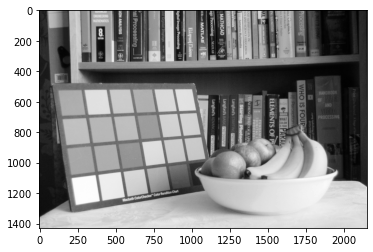

In [21]:
plt.imshow(images[0][:, :, 0], cmap=plt.cm.gray)

(1428, 2148, 3)


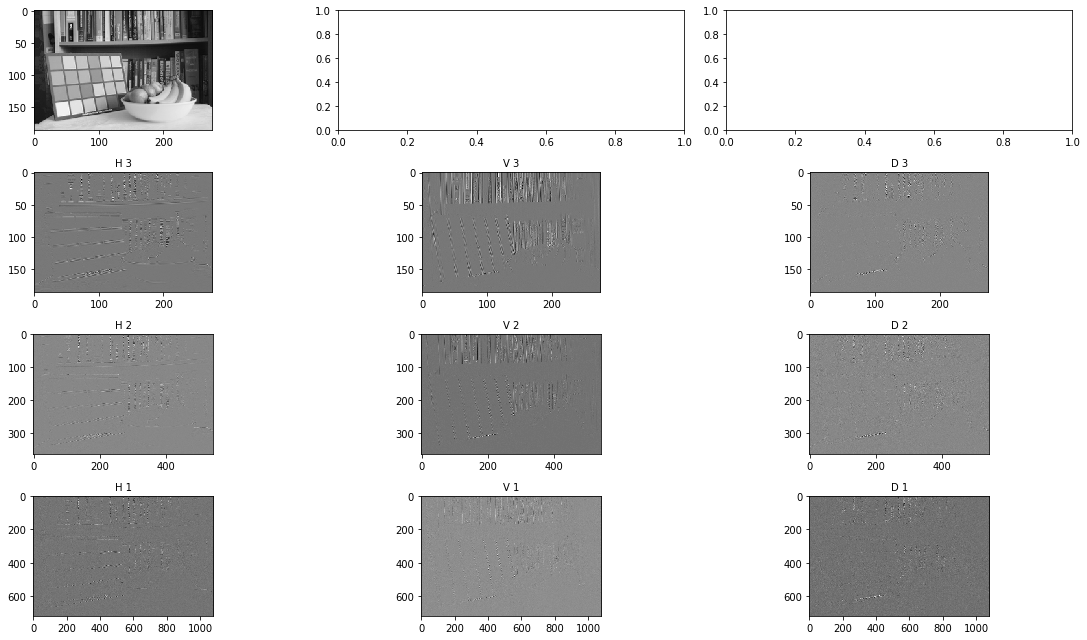

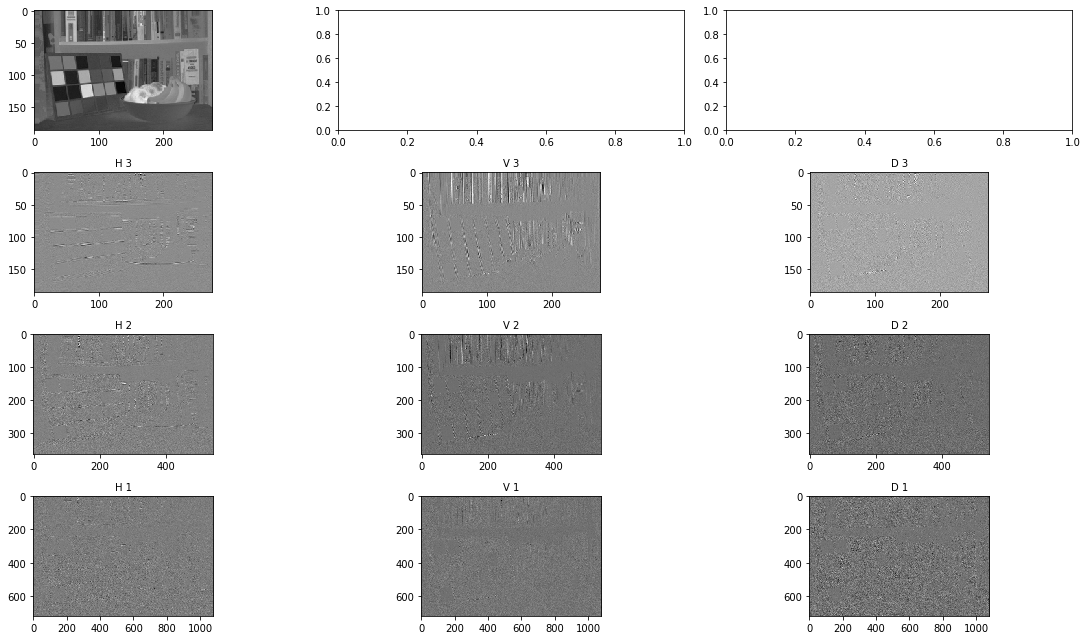

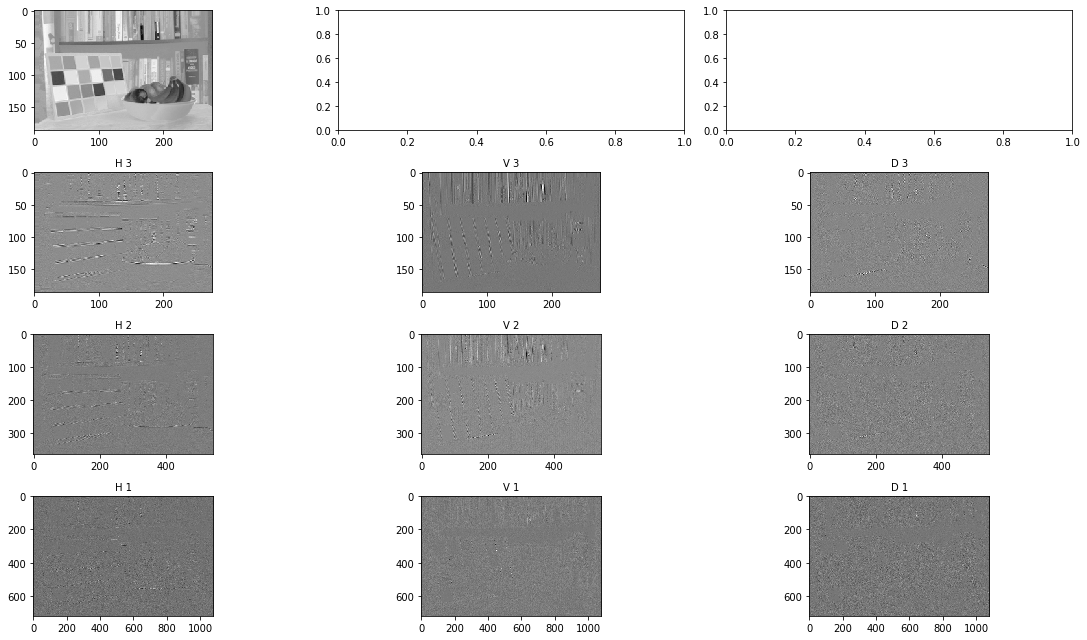

In [25]:
print(images[0].shape)
for channel in range(3):
    plt_wt_3lv(images[0][:, :, channel], level=3)

(2000, 3008, 3)


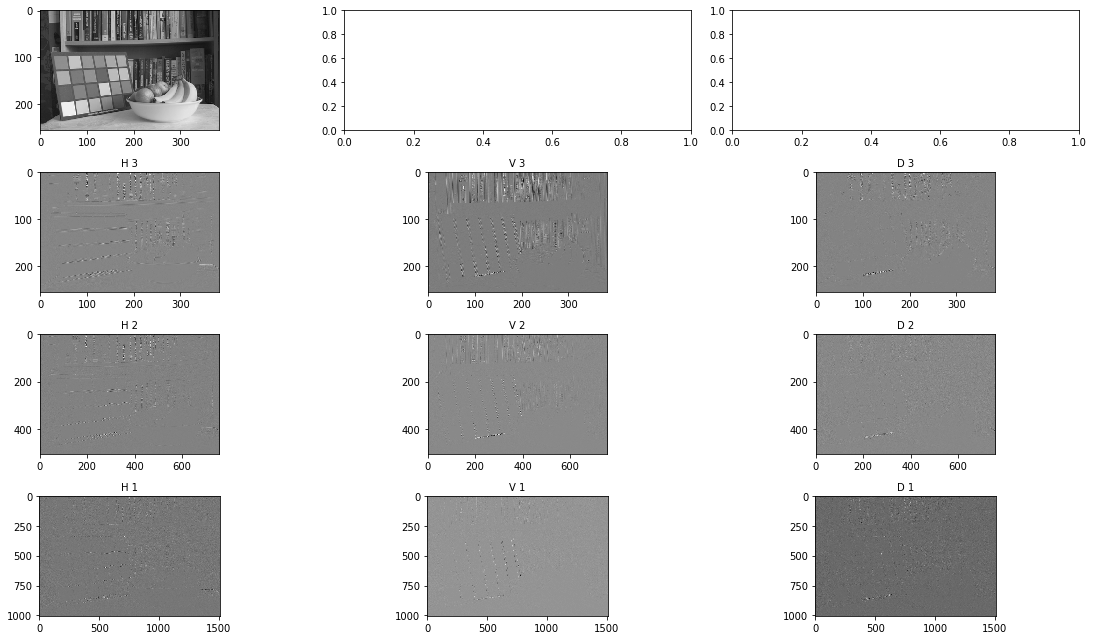

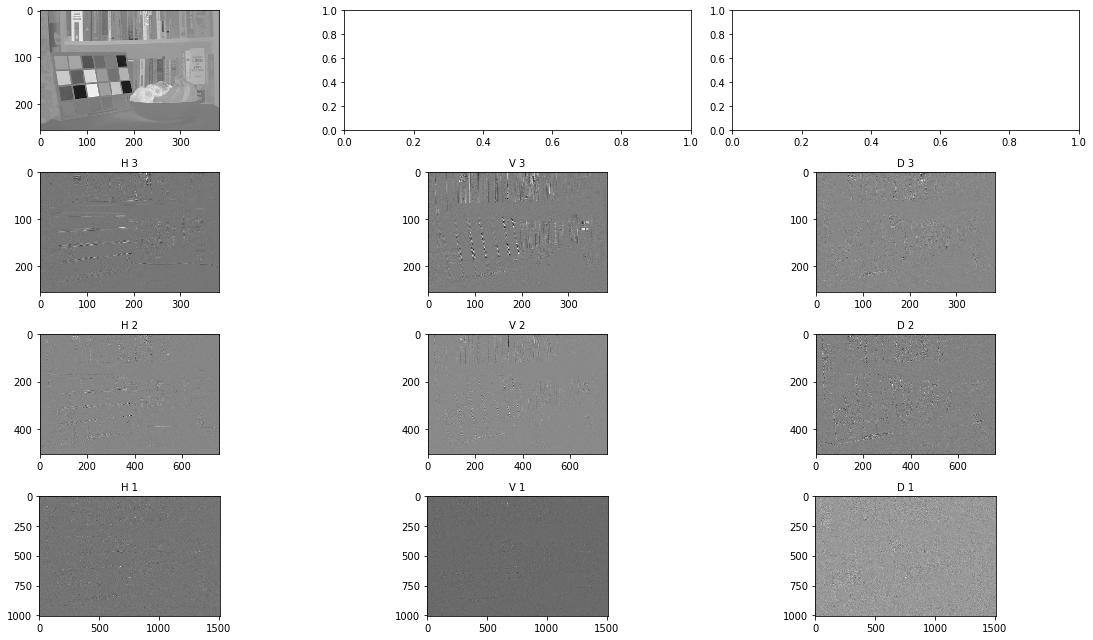

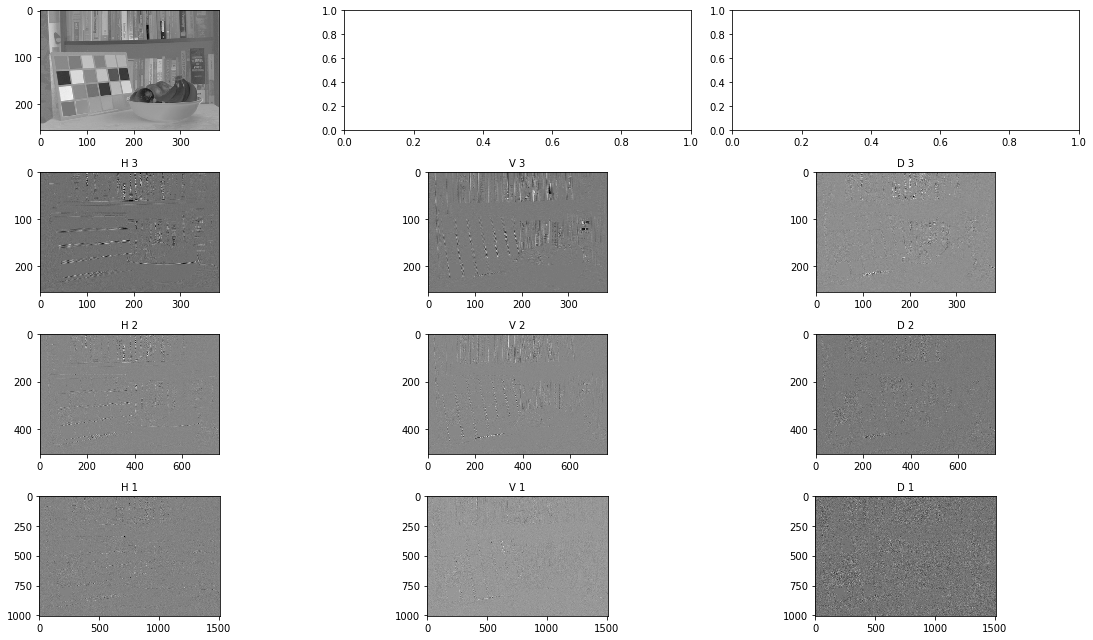

In [26]:
print(images[1].shape)
for channel in range(3):
    plt_wt_3lv(images[1][:, :, channel], level=3)